In [1]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_openai import ChatOpenAI


llm = ChatOpenAI(temperature=0, model_name="gpt-4-turbo")

llm_transformer = LLMGraphTransformer(llm=llm)

In [2]:
from langchain_core.documents import Document

text = """
1. TMEM268 (Transmembrane Protein 268) and ERLIN1 (ER Lipid Raft Associated 1) are both less well-characterized genes in the dataset that have potential roles in membrane organization and lipid raft dynamics.

2. Lipid rafts are known to play a crucial role in viral entry, including for coronaviruses. ACE2, the primary receptor for SARS-CoV-2, is thought to localize to lipid rafts.

3. ERLIN1 is known to be associated with lipid rafts in the endoplasmic reticulum. We hypothesize that its overexpression may alter lipid raft composition or dynamics throughout the cell, including the plasma membrane.

4. TMEM268, being a transmembrane protein, may interact with ERLIN1 and contribute to the reorganization of lipid rafts at the cell surface.

5. The combined effect of TMEM268 and ERLIN1 overexpression could lead to a disruption of lipid raft integrity, causing a redistribution of ACE2 receptors away from these microdomains.

6. This redistribution would make ACE2 less accessible to SARS-CoV-2, thereby inhibiting viral entry and subsequent replication.

"""
documents = [Document(page_content=text)]
graph_documents = llm_transformer.convert_to_graph_documents(documents)
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

Nodes:[Node(id='Tmem268', type='Gene'), Node(id='Erlin1', type='Gene'), Node(id='Lipid Rafts', type='Biological structure'), Node(id='Ace2', type='Protein'), Node(id='Sars-Cov-2', type='Virus'), Node(id='Endoplasmic Reticulum', type='Cellular component'), Node(id='Plasma Membrane', type='Cellular component')]
Relationships:[Relationship(source=Node(id='Tmem268', type='Gene'), target=Node(id='Lipid Rafts', type='Biological structure'), type='ASSOCIATED_WITH'), Relationship(source=Node(id='Erlin1', type='Gene'), target=Node(id='Lipid Rafts', type='Biological structure'), type='ASSOCIATED_WITH'), Relationship(source=Node(id='Ace2', type='Protein'), target=Node(id='Lipid Rafts', type='Biological structure'), type='LOCALIZED_TO'), Relationship(source=Node(id='Erlin1', type='Gene'), target=Node(id='Endoplasmic Reticulum', type='Cellular component'), type='ASSOCIATED_WITH'), Relationship(source=Node(id='Tmem268', type='Gene'), target=Node(id='Erlin1', type='Gene'), type='INTERACTS_WITH'), Rel

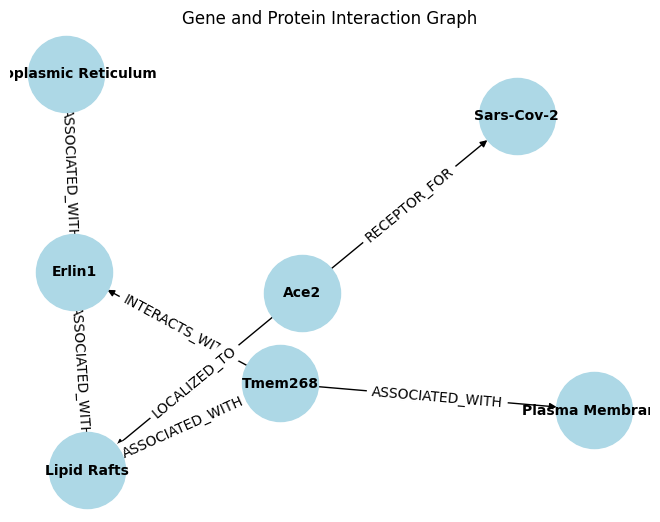

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Nodes from graph_documents
nodes = graph_documents[0].nodes

# Create a mapping from node names (string) to integers
node_id_mapping = {node.id: idx for idx, node in enumerate(nodes)}

# Convert nodes to dictionary with integer IDs
node_dict = [{'id': node_id_mapping[node.id], 'name': node.id, 'type': node.type} for node in nodes]

# Relationships from graph_documents
relationships = graph_documents[0].relationships

# Convert relationships to use integer IDs
relationship_dict = [{'source': node_id_mapping[relationship.source.id],
                      'target': node_id_mapping[relationship.target.id],
                      'type': relationship.type} for relationship in relationships]

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph using integer IDs
for node in node_dict:
    G.add_node(node['id'], label=node['name'], node_type=node['type'])

# Add edges to the graph using integer IDs
for relationship in relationship_dict:
    G.add_edge(relationship['source'], relationship['target'], label=relationship['type'])

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Fixing layout for consistency

# Drawing nodes with labels (using the original string names for display)
nx.draw(G, pos, with_labels=True, labels={node['id']: node['name'] for node in node_dict},
        node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')

# Drawing edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Gene and Protein Interaction Graph")
plt.show()

In [5]:
nodes

[Node(id='Tmem268', type='Gene'),
 Node(id='Erlin1', type='Gene'),
 Node(id='Lipid Rafts', type='Biological structure'),
 Node(id='Ace2', type='Protein'),
 Node(id='Sars-Cov-2', type='Virus'),
 Node(id='Endoplasmic Reticulum', type='Cellular component'),
 Node(id='Plasma Membrane', type='Cellular component')]

In [ ]:
#specify node and relationship types 
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Gene","Protein", "Virus"],
    allowed_relationships=["ASSOCIATED_WITH"],
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(
    documents
)
print(f"Nodes:{graph_documents_filtered[0].nodes}")
print(f"Relationships:{graph_documents_filtered[0].relationships}")